# Introduction

Heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease; heart rhythm problems (arrhythmias); and heart defects you're born with (congenital heart defects), among others.

We have patients data that shows us a few types of symptoms about heart diseases. We want to classify who has heart disease or not. 
So, we can use some supervised learning techniques.

<font color = 'blue'>
Content:
    
1. [Load and Check Data](#1)
1. [Variable Description](#2)
1. [Take a Look Data](#3)
1. [Supervised Learning](#4)
    * [Logistic Regression Classification](#5)
    * [K-Nearest Neighbour (KNN) Classification](#6)
    * [Support Vector Machine (SVM) Classification](#7)
    * [Naive Bayes Classification](#8)
    * [Decision Tree Classification](#9)
    * [Random Forest Classification](#10)
1. [Comparison of Accuracy](#11)
1. [Confusion Matrix](#12)
1. [Conclusion](#13)
    

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


<a id = '1'></a><br>
# Load and Check Data

In [2]:
df = pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")  # patients data frame

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<a id = '2'></a><br>
# Variable Description

- **age:** age in years 
- **sex:** (1 = male; 0 = female) 
- **cp:** chest pain type (4 values)
- **trestbps:** resting blood pressure (in mm Hg on admission to the hospital) 
- **chol:** serum cholestoral in mg/dl
- **fbs:** fasting blood sugar > 120 mg/dl (1 = true; 0 = false) 
- **restecg:** resting electrocardiographic results (values 0,1,2)
- **thalach:** maximum heart rate achieved
- **exang:** exercise induced angina (1 = yes; 0 = no) 
- **oldpeak:** ST depression induced by exercise relative to rest 
- **slope:** the slope of the peak exercise ST segment
- **ca:** number of major vessels (0-3) colored by flourosopy
- **thal:** 3 = normal; 6 = fixed defect; 7 = reversable defect
- **target:** 0 = has heart disease; 1 = no heart disease.

<a id = '3'></a><br>
# Take a Look Data

In [5]:
# libraries for Visualization

import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


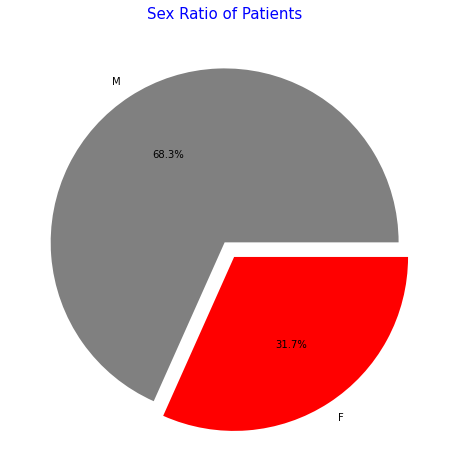

In [6]:
labels = ['M' if i == 1 else 'F' for i in df.sex.value_counts().index]
colors = ['gray','red']
explode = [0,0.1]
sizes = [df.sex.value_counts().values]

# visual
plt.figure(figsize = (8,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')   # matplot methodu , 'autopct' ile 1 tane ondalik kismini gostermek icin
plt.title('Sex Ratio of Patients',color = 'blue',fontsize = 15)
plt.show()

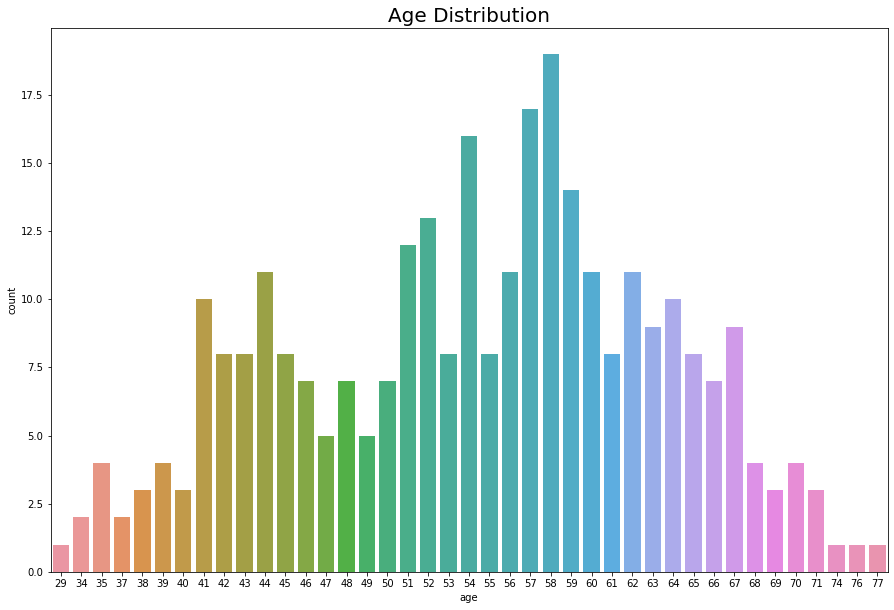

In [7]:
plt.figure(figsize=(15,10))
sns.countplot(df.age)
plt.title("Age Distribution",color = 'black',fontsize=20)
plt.show()

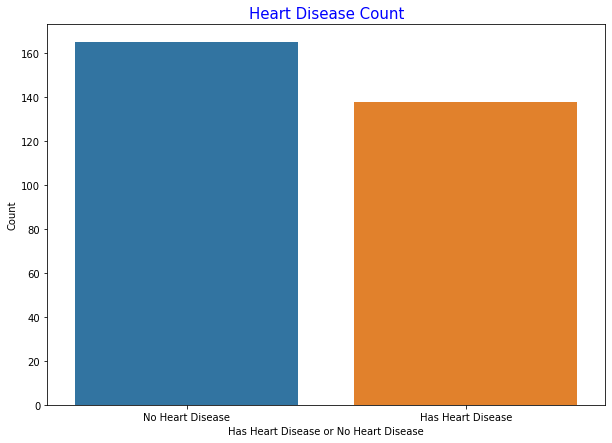

In [8]:

heart_disease = ['Has Heart Disease' if i == 0 else 'No Heart Disease' for i in df.target]

df_1 =  pd.DataFrame({'target':heart_disease})

plt.figure(figsize=(10,7))

sns.countplot(x = df_1.target)
plt.ylabel('Count')
plt.xlabel('Has Heart Disease or No Heart Disease')
plt.title('Heart Disease Count',color = 'blue',fontsize=15)
plt.show()

<a id = '4'></a><br>
# Supervised Learning

In this section, we'll use some of the widely used supervised learning classification algorithms. But first we'll prepare data.

In [9]:
y = df.target.values
x_data = df.drop(["target"],axis=1)

# normalization 
x = ( x_data - np.min(x_data) ) / ( np.max(x_data) - np.min(x_data) ).values

The data was normalized. We will split the data as test data and train data.

In [10]:
# %% split data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42) # test data = 0.2 data

In [11]:
accuracies = {} # Create a dictionary to save algorithms accuracies.

def save_score(name,score):
    """
    Parameters
    ----------
    name : Algorithm name
    score : Algorithm test score    

    Returns
    -------
    None.
    """
    accuracies[name] = score*100
    
    return None

<a id = '5'></a><br>
## Logistic Regression Classification

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train,y_train)

print("Test Accuracy {}".format(lr.score(x_test,y_test)))

save_score( "Logistic Regression Classification",lr.score(x_test,y_test) )

Test Accuracy 0.8524590163934426


<font color = 'red'>
Logistic Regression Classification algorithm accuracy is %85.24.

<a id = '6'></a><br>
## K-Nearest Neighbour (KNN) Classification

In [13]:
# knn model

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k

knn.fit(x_train,y_train)

prediction = knn.predict(x_test)

print(" {} nn score: {} ".format(3,knn.score(x_test,y_test)))

save_score( "K-Nearest Neighbour (KNN) Classification",knn.score(x_test,y_test) )

 3 nn score: 0.8360655737704918 


<font color = 'red'>
K-Nearest Neighbour (KNN) Classification algorithm  accuracy is %83.60 .

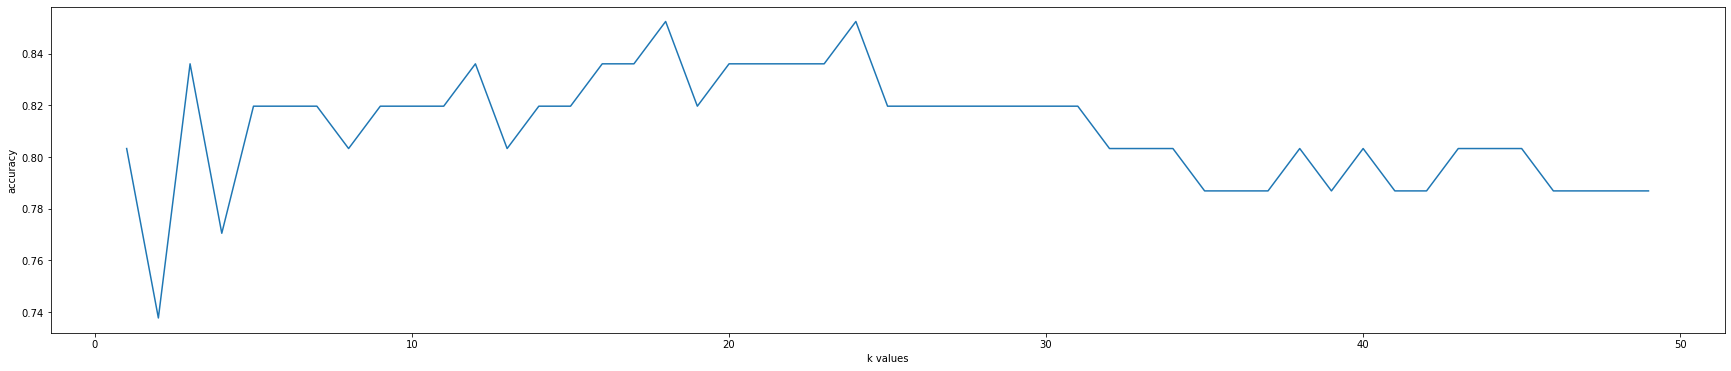

In [14]:
# find k value

score_list = []

for each in range(1,50):
    
    knn2 = KNeighborsClassifier(n_neighbors = each)
    
    knn2.fit(x_train,y_train)
    
    score_list.append(knn2.score(x_test,y_test))
    
plt.figure(figsize=(30,6))   
plt.plot(range(1,50),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

<a id = '7'></a><br>
## Support Vector Machine (SVM) Classification

In [15]:
# SVM

from sklearn.svm import SVC

svm = SVC(random_state = 1)

svm.fit(x_train,y_train)

print("print accuracy of svm algo: ",svm.score(x_test,y_test))

save_score( "Support Vector Machine (SVM) Classification",svm.score(x_test,y_test) )

print accuracy of svm algo:  0.8360655737704918


<font color = 'red'>
Support Vector Machine (SVM) Classification algorithm accuracy is %83.60 .

<a id = '8'></a><br>
## Naive Bayes Classification

In [16]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train,y_train)

print("Accuracy of Naive Bayes Algo: ",nb.score(x_test,y_test))

save_score( "Naive Bayes Classification",nb.score(x_test,y_test) )

Accuracy of Naive Bayes Algo:  0.8688524590163934


<font color = 'red'>
Naive Bayes Classification algorithm accuracy is %86.88 .

<a id = '9'></a><br>
## Decision Tree Classification

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)

print("score: ", dt.score(x_test,y_test))

save_score( "Decision Tree Classification",dt.score(x_test,y_test) )

score:  0.8360655737704918


<font color = 'red'>
Decision Tree Classification algorithm accuracy is %78.68 .

<a id = '10'></a><br>
## Random Forest Classification

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100,random_state = 1)  # n_estimater = kac agac olacak

rf.fit(x_train,y_train)

print("random forest algo result: ",rf.score(x_test,y_test))

accuracies["Random Forest Classification"] = [rf.score(x_test,y_test)*100]

save_score( "Random Forest Classification",rf.score(x_test,y_test) )

random forest algo result:  0.8524590163934426


<font color = 'red'>
Random Forest Classification algorithm accuracy is %85.24 .

<a id = '11'></a><br>
## Comparison of Accuracy

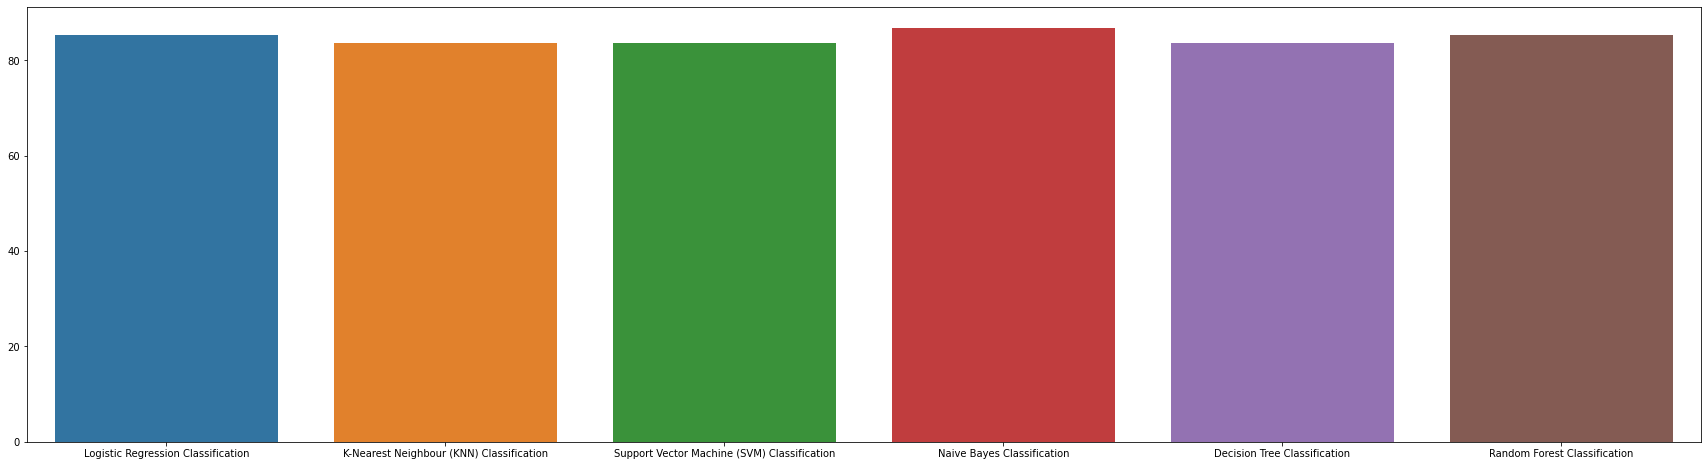

In [19]:
plt.figure(figsize=(30,8))
sns.barplot(x = list( accuracies.keys() ), y = list( accuracies.values() ) )
plt.show()

<a id = '12'></a><br>
## Confusion Matrix

In [20]:
# Predictions

y_lr_pred = lr.predict(x_test)
y_knn_pred = knn.predict(x_test)
y_svm_pred = svm.predict(x_test)
y_nb_pred = nb.predict(x_test)
y_dt_pred = dt.predict(x_test)
y_rf_pred = rf.predict(x_test)

y_true = y_test

In [21]:
# confusion matrix

from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_true,y_lr_pred)
cm_knn = confusion_matrix(y_true,y_knn_pred)
cm_svm = confusion_matrix(y_true,y_svm_pred)
cm_nb = confusion_matrix(y_true,y_nb_pred)
cm_dt = confusion_matrix(y_true,y_dt_pred)
cm_rf = confusion_matrix(y_true,y_rf_pred)

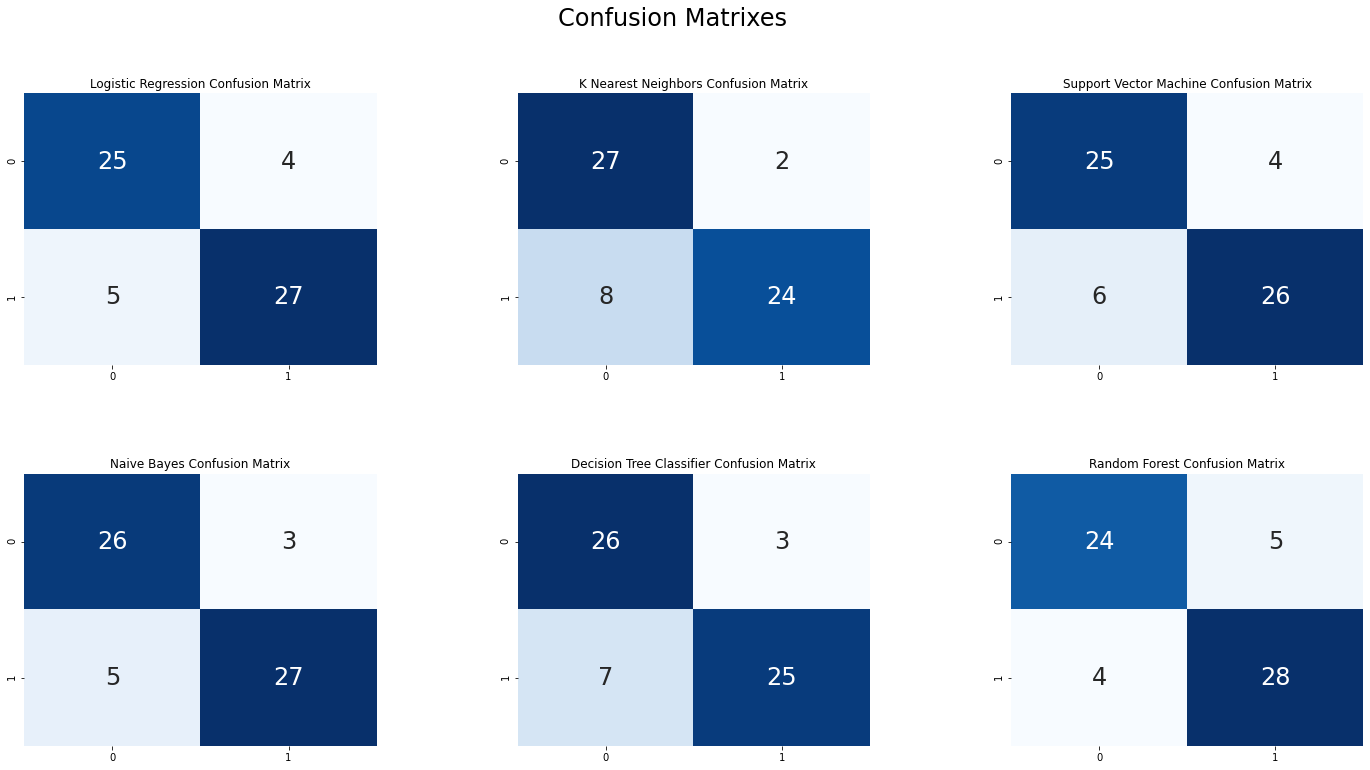

In [22]:
# cm visualization

plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dt,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

<a id = '13'></a><br>
## Conclusion
I am new with ML and just trying to apply what I have just learned. Thanks for reading.